In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("hf://datasets/ayjays132/Emotionverse/train.json")

In [25]:
df

,text,primary_emotion,secondary_emotions,meta_emotions,sentiment,interaction_style,intensity,context
0,I’m proud of my friend for overcoming her stru...,Admiration,"[Envy, Guilt]","[Pride about admiration, Shame about envy]",Mixed,Reflective,4,Relationships
1,Finally finished that project! It was exhausti...,Relief,"[Joy, Pride]",[Contentment about relief],Positive,Assertive,5,Career
2,The laughter we shared during our reunion was ...,Nostalgia,"[Joy, Bittersweetness]",[Gratitude about joy],Positive,Supportive,6,Relationships
3,Why does everything feel so uncertain right no...,Uncertainty,"[Anxiety, Frustration]",[Vulnerability about uncertainty],Ambiguous,Conflicted,5,Self-Reflection
4,Graduation feels both exciting and sad. It’s t...,Bittersweetness,"[Joy, Sadness]","[Pride about accomplishment, Nostalgia about e...",Mixed,Supportive,6,Education
...,...,...,...,...,...,...,...,...
1869,I feel like I’ve lost sight of what truly matt...,Uncertainty,"[Anxiety, Reflection]","[Reflection on priorities, Commitment to mindf...",Ambiguous,Conflicted,6,Self-Reflection
1870,I’m so excited to see my family again after so...,Joy,"[Gratitude, Excitement]","[Reflection on connection, Commitment to relat...",Positive,Reverent,9,Family
1871,I just can’t shake this nagging feeling that I...,Self-Doubt,"[Frustration, Guilt]","[Reflection on self-worth, Commitment to growth]",Negative,Supportive,8,Career
1872,I love rainy days. They give me a chance to re...,Serenity,"[Peace, Contentment]","[Reflection on nature, Commitment to mindfulness]",Positive,Reverent,6,Nature


In [26]:
# Check label distribution
df.columns

Index(['text', 'primary_emotion', 'secondary_emotions', 'meta_emotions',
       'sentiment', 'interaction_style', 'intensity', 'context'],
      dtype='object')

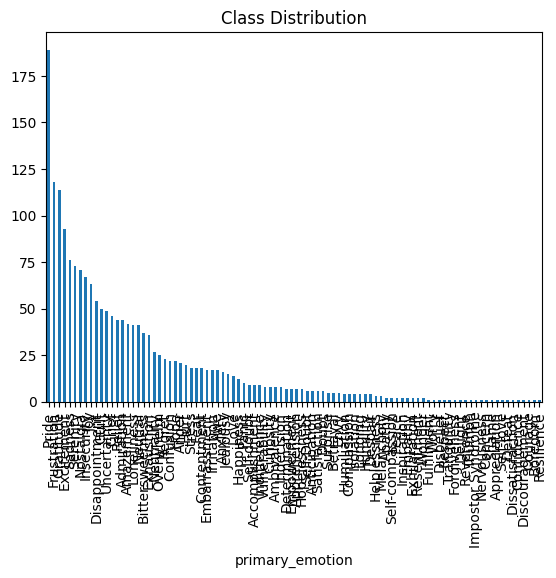

In [27]:
df['primary_emotion'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:

# Load your dataset (replace with actual loading method)
# df = pd.read_csv("your_dataset.csv")  # If using a CSV file

# Count occurrences of each primary emotion
emotion_counts = df['primary_emotion'].value_counts()

# Find rare emotions (less than 5 instances)
min_samples = 5
rare_emotions = emotion_counts[emotion_counts < min_samples].index

# Function to replace rare primary emotions with secondary emotions
def replace_rare_emotions(row):
    if row['primary_emotion'] in rare_emotions:
        sec_emotions = row['secondary_emotions']  # Secondary emotions list
        if isinstance(sec_emotions, list) and len(sec_emotions) == 2:
            sec1, sec2 = sec_emotions
            # If the first secondary emotion is not rare, replace it
            if sec1 not in rare_emotions:
                return sec1
            # If the second secondary emotion is not rare, replace it
            elif sec2 not in rare_emotions:
                return sec2
            # If both are rare, return None (to drop later)
            else:
                return None
    return row['primary_emotion']

# Apply the function to update primary emotions
df['primary_emotion'] = df.apply(replace_rare_emotions, axis=1)

# Remove entries where primary_emotion became None
df_filtered = df.dropna(subset=['primary_emotion'])

# Show the updated class distribution
print("Updated Emotion Distribution:\n", df_filtered['primary_emotion'].value_counts())


Updated Emotion Distribution:
 primary_emotion
Pride              193
Frustration        125
Gratitude          121
Excitement          94
Sadness             88
Serenity            73
Nostalgia           73
Insecurity          67
Joy                 64
Disappointment      54
Guilt               50
Uncertainty         49
Admiration          46
Grief               46
Loneliness          44
Relief              44
Amazement           44
Neutral             41
Exhaustion          40
Bittersweetness     37
Hope                31
Neutrality          27
Anger               26
Overwhelm           25
Regret              24
Confusion           22
Hurt                20
Awe                 19
Contentment         19
Embarrassment       18
Fear                18
Stress              18
Irritation          17
Anxiety             16
Love                15
Jealousy            15
Happiness           12
Panic               10
Indifference         9
Accomplishment       9
Curiosity            9
Self-doubt

In [30]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df_filtered['text'])
y = df_filtered['primary_emotion']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Show classification report
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

 Accomplishment       1.00      0.50      0.67         2
     Admiration       0.54      0.78      0.64         9
      Amazement       0.80      0.89      0.84         9
    Ambivalence       0.00      0.00      0.00         2
          Anger       0.67      0.40      0.50         5
   Anticipation       0.00      0.00      0.00         1
        Anxiety       0.50      0.33      0.40         3
   Apprehension       0.00      0.00      0.00         1
            Awe       0.00      0.00      0.00         4
       Betrayal       0.00      0.00      0.00         1
Bittersweetness       0.00      0.00      0.00         7
      Confusion       0.00      0.00      0.00         4
    Contentment       0.50      0.25      0.33         4
      Curiosity       1.00      0.50      0.67         2
  Determination       0.00      0.00      0.00         2
 Disappointment       0.86      0.55      0.67        11
          Doubt       0.00    

/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


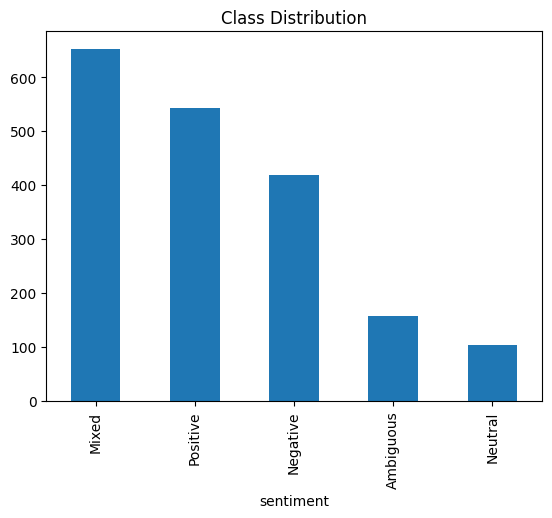

In [31]:
df_filtered['sentiment'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.show()

In [44]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
# initialize the Porter Stemmer


# Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation tokens (keep only alphanumeric tokens)
    tokens = [token for token in tokens if token.isalnum()]
    # Apply lemmatization
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    # Apply stemming
    stemmed = [stemmer.stem(token) for token in tokens]
    return " ".join(lemmatized), " ".join(stemmed)

# Apply preprocessing to the "text" column
df_filtered["lemmatized_text"], df_filtered["stemmed_text"] = zip(*df_filtered["text"].apply(preprocess_text))

# Display the processed DataFrame
print(df_filtered.head())

                                                text  primary_emotion  \
0  I’m proud of my friend for overcoming her stru...       Admiration   
1  Finally finished that project! It was exhausti...           Relief   
2  The laughter we shared during our reunion was ...        Nostalgia   
3  Why does everything feel so uncertain right no...      Uncertainty   
4  Graduation feels both exciting and sad. It’s t...  Bittersweetness   

       secondary_emotions                                      meta_emotions  \
0           [Envy, Guilt]         [Pride about admiration, Shame about envy]   
1            [Joy, Pride]                         [Contentment about relief]   
2  [Joy, Bittersweetness]                              [Gratitude about joy]   
3  [Anxiety, Frustration]                  [Vulnerability about uncertainty]   
4          [Joy, Sadness]  [Pride about accomplishment, Nostalgia about e...   

   sentiment interaction_style  intensity          context  \
0      Mixed      

In [ ]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the 'text' column
df_filtered['embedding'] = df_filtered['text'].apply(lambda x: model.encode(x))


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform using the lemmatized_text column
X_tfidf = vectorizer.fit_transform(df_filtered['lemmatized_text'])

# Optionally, convert to DataFrame for inspection
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())


In [48]:

tfidf_df


,10,10k,12,13,14,15,16,40,abandoned,ability,...,yoga,you,young,younger,your,yourself,youth,youthful,zip,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
